In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist =keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

In [8]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [11]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
model_history = model.fit(X_train, y_train, epochs=30,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 37s 42ms/step - loss: 0.8766 - accuracy: 0.6988 - val_loss: 0.7540 - val_accuracy: 0.7332
Epoch 2/30
860/860 [==============================] - 36s 42ms/step - loss: 0.5386 - accuracy: 0.8046 - val_loss: 0.4903 - val_accuracy: 0.8212
Epoch 3/30
860/860 [==============================] - 36s 42ms/step - loss: 0.4810 - accuracy: 0.8261 - val_loss: 0.9134 - val_accuracy: 0.7126
Epoch 4/30
860/860 [==============================] - 36s 42ms/step - loss: 0.4440 - accuracy: 0.8413 - val_loss: 0.4157 - val_accuracy: 0.8566
Epoch 5/30
860/860 [==============================] - 36s 42ms/step - loss: 0.4201 - accuracy: 0.8500 - val_loss: 0.4358 - val_accuracy: 0.8478
Epoch 6/30
860/860 [==============================] - 36s 42ms/step - loss: 0.3956 - accuracy: 0.8582 - val_loss: 0.3753 - val_accuracy: 0.8712
Epoch 7/30
860/860 [==============================] - 36s 42ms/step - loss: 0.3783 - accuracy: 0.8656 - val_loss: 0.4065 - val_accuracy:

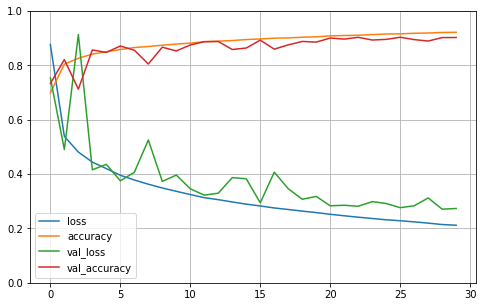

In [17]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
ev = model.evaluate(X_test_n, y_test)
ev

313/313 [==============================] - 3s 9ms/step - loss: 0.2825 - accuracy: 0.8987


[0.2825251519680023, 0.8986999988555908]

In [19]:
X_new = X_test[:3]

In [20]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [21]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


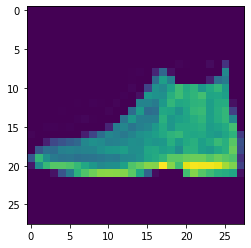

In [22]:
print(plt.imshow(X_test[0].reshape((28,28))))